In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/Image Classification using Convolutional Neural Networks (CNN)

/content/drive/MyDrive/Colab Notebooks/Image Classification using Convolutional Neural Networks (CNN)


In [3]:
!ls

Datasets  Images  Models


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10, mnist
from sklearn.metrics import accuracy_score, precision_score, classification_report

In [5]:
# Load CIFAR-10 dataset
(x_train_cifar10, y_train_cifar10), (x_test_cifar10, y_test_cifar10) = cifar10.load_data()
class_names_cifar10 = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Load MNIST dataset
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()
class_names_mnist = [str(i) for i in range(10)]

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
# Preprocess CIFAR-10 data
x_train_cifar10 = x_train_cifar10.astype('float32') / 255.0
x_test_cifar10 = x_test_cifar10.astype('float32') / 255.0
y_train_cifar10 = to_categorical(y_train_cifar10, 10)
y_test_cifar10 = to_categorical(y_test_cifar10, 10)

# Preprocess MNIST data
x_train_mnist = x_train_mnist.astype('float32') / 255.0
x_test_mnist = x_test_mnist.astype('float32') / 255.0
x_train_mnist = np.expand_dims(x_train_mnist, -1)
x_test_mnist = np.expand_dims(x_test_mnist, -1)
y_train_mnist = to_categorical(y_train_mnist, 10)
y_test_mnist = to_categorical(y_test_mnist, 10)

In [7]:
# Define a simple CNN model
def create_simple_cnn(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [8]:
# Train and evaluate the model on CIFAR-10 dataset
cnn_cifar10 = create_simple_cnn(x_train_cifar10.shape[1:], 10)
history_cifar10 = cnn_cifar10.fit(x_train_cifar10, y_train_cifar10, epochs=10, validation_data=(x_test_cifar10, y_test_cifar10))

Epoch 1/10
1563/1563 [==============================] - 73s 46ms/step - loss: 1.6202 - accuracy: 0.4088 - val_loss: 1.2573 - val_accuracy: 0.5427
Epoch 2/10
1563/1563 [==============================] - 82s 52ms/step - loss: 1.2823 - accuracy: 0.5451 - val_loss: 1.0897 - val_accuracy: 0.6173
Epoch 3/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.1579 - accuracy: 0.5939 - val_loss: 1.0178 - val_accuracy: 0.6450
Epoch 4/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.0676 - accuracy: 0.6252 - val_loss: 1.0063 - val_accuracy: 0.6522
Epoch 5/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.0064 - accuracy: 0.6479 - val_loss: 0.9174 - val_accuracy: 0.6805
Epoch 6/10
1563/1563 [==============================] - 63s 41ms/step - loss: 0.9565 - accuracy: 0.6658 - val_loss: 0.9541 - val_accuracy: 0.6677
Epoch 7/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9138 - accuracy: 0.6809 - val_loss: 0.8912 -

In [9]:
# Train and evaluate the model on MNIST dataset
cnn_mnist = create_simple_cnn(x_train_mnist.shape[1:], 10)
history_mnist = cnn_mnist.fit(x_train_mnist, y_train_mnist, epochs=10, validation_data=(x_test_mnist, y_test_mnist))

Epoch 1/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.2061 - accuracy: 0.9383 - val_loss: 0.0426 - val_accuracy: 0.9863
Epoch 2/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0786 - accuracy: 0.9774 - val_loss: 0.0353 - val_accuracy: 0.9880
Epoch 3/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0572 - accuracy: 0.9832 - val_loss: 0.0314 - val_accuracy: 0.9902
Epoch 4/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0470 - accuracy: 0.9865 - val_loss: 0.0301 - val_accuracy: 0.9897
Epoch 5/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0380 - accuracy: 0.9883 - val_loss: 0.0272 - val_accuracy: 0.9913
Epoch 6/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0338 - accuracy: 0.9894 - val_loss: 0.0293 - val_accuracy: 0.9913
Epoch 7/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0282 - accuracy: 0.9910 - val_loss: 0.0234 -

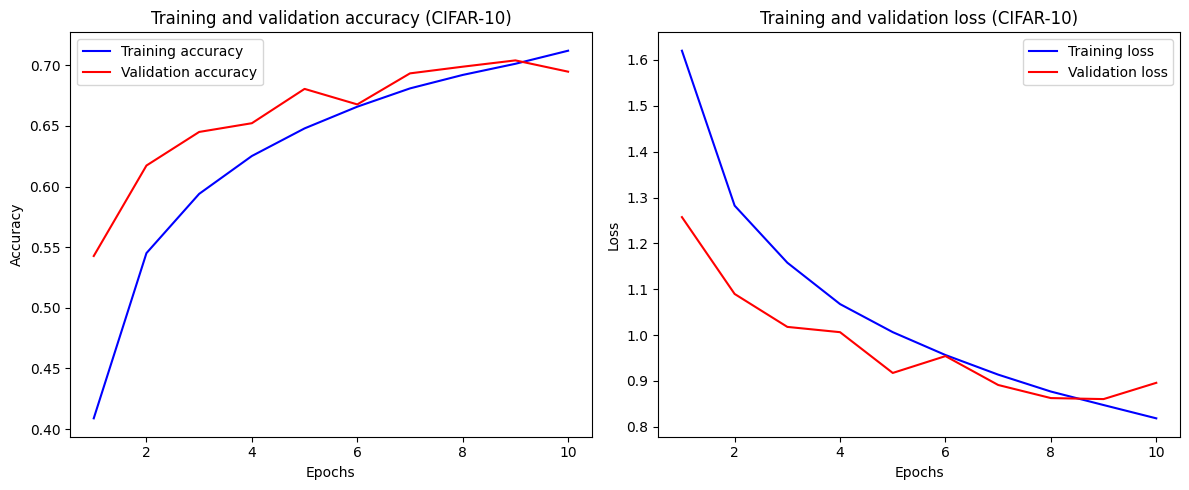

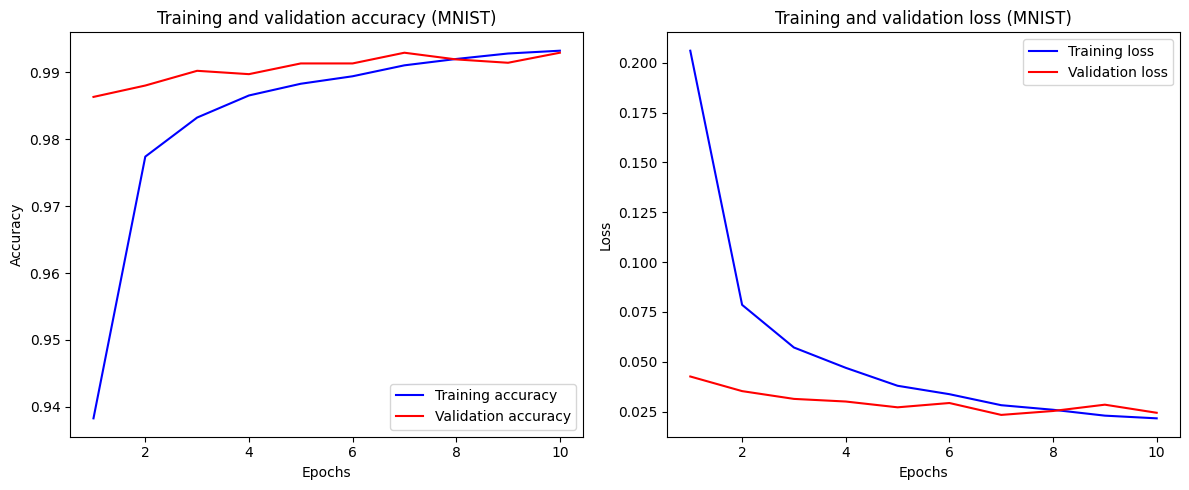

In [10]:
# Plot training history
def plot_training_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title(f'Training and validation accuracy ({title})')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(f'Training and validation loss ({title})')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history_cifar10, 'CIFAR-10')
plot_training_history(history_mnist, 'MNIST')

In [13]:
# Evaluate the model on CIFAR-10 test data
y_pred_cifar10 = np.argmax(cnn_cifar10.predict(x_test_cifar10), axis=-1)
y_true_cifar10 = np.argmax(y_test_cifar10, axis=-1)
accuracy_cifar10 = accuracy_score(y_true_cifar10, y_pred_cifar10)
precision_cifar10 = precision_score(y_true_cifar10, y_pred_cifar10, average='weighted')

print("CIFAR-10 Model Evaluation:")
print(f"Accuracy: {accuracy_cifar10:.10f}")
print(f"Precision: {precision_cifar10:.10f}")
print(classification_report(y_true_cifar10, y_pred_cifar10, target_names=class_names_cifar10))

313/313 [==============================] - 6s 18ms/step
CIFAR-10 Model Evaluation:
Accuracy: 0.6947000000
Precision: 0.6939820196
              precision    recall  f1-score   support

    airplane       0.71      0.74      0.73      1000
  automobile       0.75      0.88      0.81      1000
        bird       0.58      0.61      0.59      1000
         cat       0.58      0.41      0.48      1000
        deer       0.66      0.61      0.63      1000
         dog       0.68      0.55      0.61      1000
        frog       0.64      0.87      0.74      1000
       horse       0.74      0.77      0.75      1000
        ship       0.77      0.83      0.80      1000
       truck       0.84      0.69      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



In [14]:
# Evaluate the model on MNIST test data
y_pred_mnist = np.argmax(cnn_mnist.predict(x_test_mnist), axis=-1)
y_true_mnist = np.argmax(y_test_mnist, axis=-1)
accuracy_mnist = accuracy_score(y_true_mnist, y_pred_mnist)
precision_mnist = precision_score(y_true_mnist, y_pred_mnist, average='weighted')

print("\nMNIST Model Evaluation:")
print(f"Accuracy: {accuracy_mnist:.10f}")
print(f"Precision: {precision_mnist:.10f}")
print(classification_report(y_true_mnist, y_pred_mnist, target_names=class_names_mnist))

313/313 [==============================] - 4s 13ms/step

MNIST Model Evaluation:
Accuracy: 0.9929000000
Precision: 0.9929076933
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

